## Exploring 10 seconds recorded by the Max4466 chip

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

from glob import glob

import librosa  # for audio analysis
import librosa.display
import IPython.display as ipd

from itertools import cycle

sns.set_theme(style="white", palette=None)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]
color_cycle = cycle(plt.rcParams["axes.prop_cycle"].by_key()["color"])

In [27]:
from filtering import filter_human
input_file = '_assets/recorded_audio.wav'
raw_audio_file = glob(input_file)

output_file = "_assets/filtered_audio.wav"
filter_human(input_file,output_file,300,3400,4)
# or just 
#filter_human(input_file, output_file)
audio_file = glob(output_file)

In [28]:
ipd.Audio(audio_file[0])

In [5]:
audio_path = librosa.example('trumpet')
ipd.Audio(audio_path)

In [29]:
y, sr = librosa.load(audio_file[0])
print(f'y: {y[:10]}')
print(f'shape y: {y.shape}')
print(f'sr: {sr}')

y: [ 0.11151485  0.03764293 -0.10189879 -0.20799664 -0.332824   -0.43182826
 -0.53807044 -0.61948353 -0.70137477 -0.759578  ]
shape y: (220766,)
sr: 22050


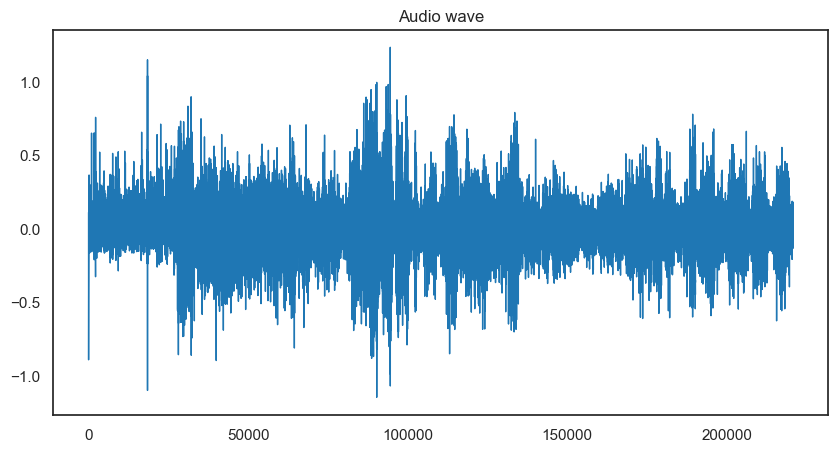

In [30]:
pd.Series(y).plot(figsize=(10, 5),
                  lw=1,
                  title='Audio wave',
                 color=color_pal[0])
plt.show()

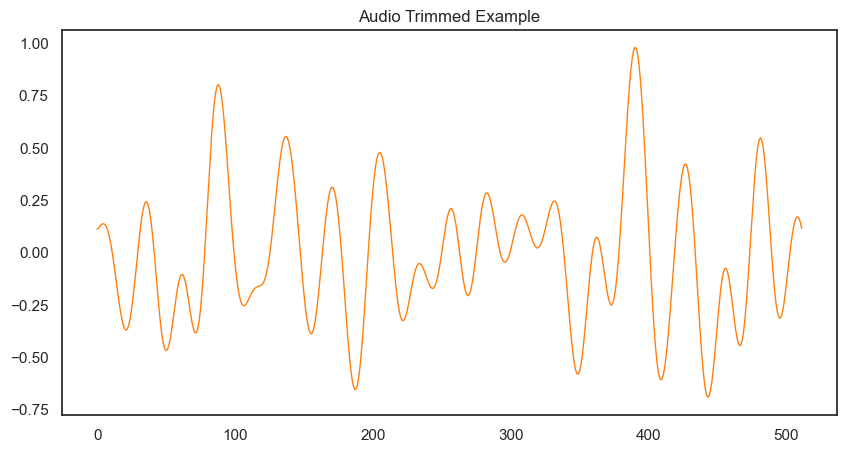

In [31]:
# Trimming leading/lagging silence
y_trimmed, _ = librosa.effects.trim(y, top_db=0.04)
pd.Series(y_trimmed).plot(figsize=(10, 5),
                  lw=1,
                  title='Audio Trimmed Example',
                 color=color_pal[1])
plt.show()

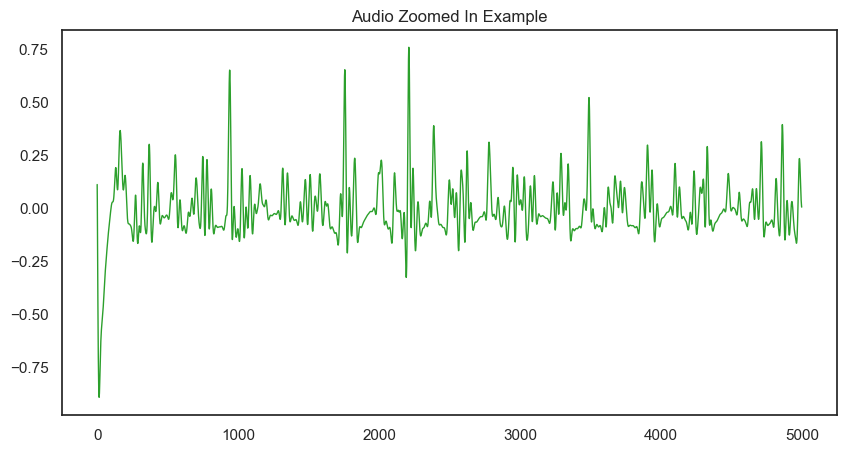

In [32]:
pd.Series(y[0:5000]).plot(figsize=(10, 5),
                  lw=1,
                  title='Audio Zoomed In Example',
                 color=color_pal[2])
plt.show()

# Spectogram

In [33]:
D = librosa.stft(y)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
S_db.shape

(1025, 432)

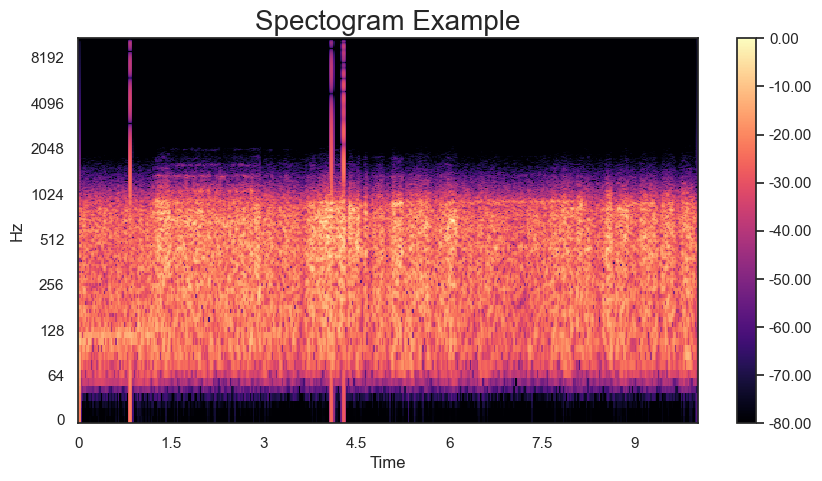

In [34]:
# Plot the transformed audio data
fig, ax = plt.subplots(figsize=(10, 5))
img = librosa.display.specshow(S_db,
                              x_axis='time',
                              y_axis='log',
                              ax=ax)
ax.set_title('Spectogram Example', fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.2f')
plt.show()

# Mel Spectogram

In [35]:
S = librosa.feature.melspectrogram(y=y,
                                   sr=sr,
                                   n_mels=128 * 2,)
S_db_mel = librosa.amplitude_to_db(S, ref=np.max)

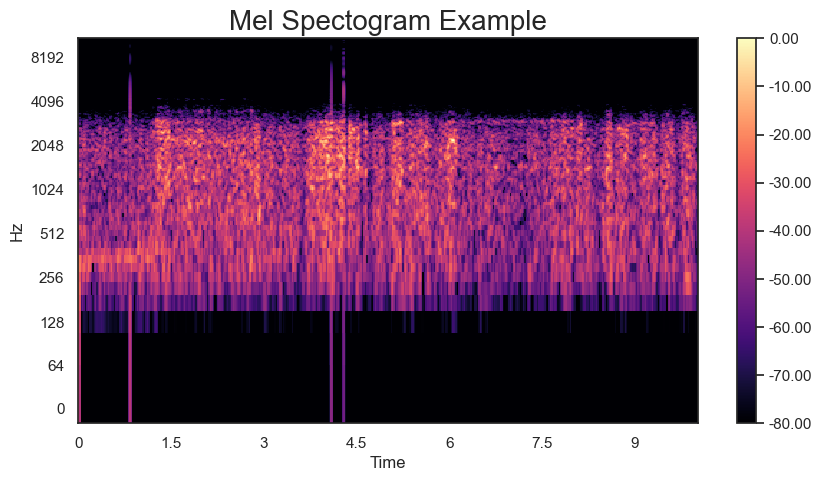

In [36]:
fig, ax = plt.subplots(figsize=(10, 5))
# Plot the mel spectogram
img = librosa.display.specshow(S_db_mel,
                              x_axis='time',
                              y_axis='log',
                              ax=ax)
ax.set_title('Mel Spectogram Example', fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.2f')
plt.show()